# Scaffold analysis


projekt: demonstrace a aplikace na dataset, interpretace vysledku

In [2]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import csv
import gzip
import pandas as pd

from rdkit import RDLogger
RDLogger.DisableLog('rdApp.error')

In [3]:
# load dataset
suppl = Chem.SDMolSupplier("../data/drugbank.sdf")
drug_bank = [[mol, 'drugbank'] for mol in suppl if mol]

with gzip.open("../data/actives_final.sdf.gz") as sdf:
    supp_actives = Chem.ForwardSDMolSupplier(sdf)
    actives = [[mol, 'acives'] for mol in supp_actives if mol]

with gzip.open("../data/decoys_final.sdf.gz") as sdf:
    supp_decoys = Chem.ForwardSDMolSupplier(sdf)
    decoys = [[mol, 'decoys'] for mol in supp_decoys if mol]

df_db = pd.DataFrame(drug_bank, columns=['Mol', 'Source'])
df_ac = pd.DataFrame(actives, columns=['Mol', 'Source'])
df_dc = pd.DataFrame(decoys, columns=['Mol', 'Source'])

In [4]:
df_ac

,Mol,Source
0,<rdkit.Chem.rdchem.Mol object at 0x7f3453e4e9d0>,acives
1,<rdkit.Chem.rdchem.Mol object at 0x7f3453e4ea40>,acives
2,<rdkit.Chem.rdchem.Mol object at 0x7f3453e4eab0>,acives
3,<rdkit.Chem.rdchem.Mol object at 0x7f3453e4eb20>,acives
4,<rdkit.Chem.rdchem.Mol object at 0x7f3453e4eb90>,acives
...,...,...
872,<rdkit.Chem.rdchem.Mol object at 0x7f3453e76ab0>,acives
873,<rdkit.Chem.rdchem.Mol object at 0x7f3453e76b20>,acives
874,<rdkit.Chem.rdchem.Mol object at 0x7f3453e76b90>,acives
875,<rdkit.Chem.rdchem.Mol object at 0x7f3453e76c00>,acives


In [5]:
# get smiles from molecules to new column
df_db['smiles'] = df_db['Mol'].apply(Chem.MolToSmiles)
df_ac['smiles'] = df_ac['Mol'].apply(Chem.MolToSmiles)
df_dc['smiles'] = df_dc['Mol'].apply(Chem.MolToSmiles)

In [6]:
df_ac

,Mol,Source,smiles
0,<rdkit.Chem.rdchem.Mol object at 0x7f3453e4e9d0>,acives,COc1cc(NC(=O)C2CC2)c(Cl)cc1C(=O)N[C@H]1CC[N@@H...
1,<rdkit.Chem.rdchem.Mol object at 0x7f3453e4ea40>,acives,CC(C)(C)c1nc(N2CC[NH+](CCCCN3C(=O)CCCc4c(O)ccc...
2,<rdkit.Chem.rdchem.Mol object at 0x7f3453e4eab0>,acives,CC(C)(C)c1nc(N2CCN(CCCCN3C(=O)CCCc4c(O)cccc43)...
3,<rdkit.Chem.rdchem.Mol object at 0x7f3453e4eb20>,acives,O=C(NCCCC[NH+]1CCN(C(c2ccccc2)c2ccccc2)CC1)c1c...
4,<rdkit.Chem.rdchem.Mol object at 0x7f3453e4eb90>,acives,O=C(NCCCC[NH+]1CCN([C@H](c2ccccc2)c2ccc(Cl)cc2...
...,...,...,...
872,<rdkit.Chem.rdchem.Mol object at 0x7f3453e76ab0>,acives,COc1ccccc1N1CC[NH+](CCCCNC(=O)/C=C/c2cccc3c2OC...
873,<rdkit.Chem.rdchem.Mol object at 0x7f3453e76b20>,acives,COc1ccccc1N1CCN(CCCCNC(=O)/C=C/c2cccc3c2OCO3)CC1
874,<rdkit.Chem.rdchem.Mol object at 0x7f3453e76b90>,acives,c1ccc(C[NH2+]CCOc2cccc3[nH]ncc23)cc1
875,<rdkit.Chem.rdchem.Mol object at 0x7f3453e76c00>,acives,FC(F)(F)c1nc2c(OCC[NH2+]Cc3ccccc3)cccc2[nH]1


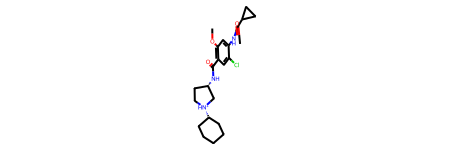

In [7]:
# show firs molecule from db_actives
df_ac.iloc[0]['Mol']

In [8]:
# compute 2d coordinates for all molecules and save to new column 'Mol2D'
for mol in df_db['Mol']:
    Chem.Compute2DCoords(mol)
df_db['Mol2D'] = df_db['Mol']

for mol in df_ac['Mol']:
    Chem.Compute2DCoords(mol)
df_ac['Mol2D'] = df_ac['Mol']

for mol in df_dc['Mol']:
    Chem.Compute2DCoords(mol)
df_dc['Mol2D'] = df_dc['Mol']


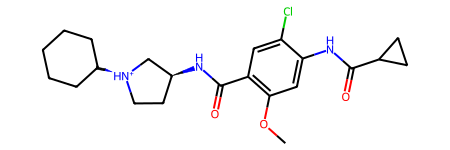

In [9]:
# show first molecule from db_actives
df_ac.iloc[0]['Mol2D']

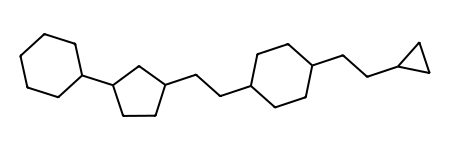

In [10]:
# calculate scaffolds for 1st molecule in db_actives
from rdkit.Chem.Scaffolds import MurckoScaffold
scaffold1 = MurckoScaffold.GetScaffoldForMol(df_ac.iloc[0]['Mol2D'])
scaffold1 = MurckoScaffold.MakeScaffoldGeneric(scaffold1)
scaffold1 = MurckoScaffold.GetScaffoldForMol(scaffold1)
scaffold1



In [11]:
# create function for scaffold calculation return smiles
def get_scaffold(mol):
    Chem.rdmolops.RemoveStereochemistry(mol) # get rid of stereo, doesn't matter much in scaffolds
    Chem.Compute2DCoords(mol)
    try:
        scaffold = MurckoScaffold.GetScaffoldForMol(mol)
        scaffold = MurckoScaffold.MakeScaffoldGeneric(scaffold)
        scaffold = MurckoScaffold.GetScaffoldForMol(scaffold)
        scaffold = Chem.MolToSmiles(scaffold)
    except ValueError:
        scaffold = ""
    return scaffold

In [12]:
# calculate scaffolds for all molecules in df using smiles
#df_ac['Scaffold'] = df_ac['smiles'].apply(Chem.MolFromSmiles).apply(get_scaffold)
#df_dc['Scaffold'] = df_dc['smiles'].apply(Chem.MolFromSmiles).apply(get_scaffold)
#df_db['Scaffold'] = df_db['smiles'].apply(Chem.MolFromSmiles).apply(get_scaffold)

In [13]:
df_ac['Scaffold_smiles'] = df_ac['Mol'].apply(get_scaffold)
df_dc['Scaffold_smiles'] = df_dc['Mol'].apply(get_scaffold)
df_db['Scaffold_smiles'] = df_db['Mol'].apply(get_scaffold)

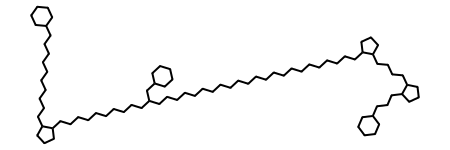

In [17]:
# show first molecule from df_db
df_db.iloc[0]['Scaffold_smiles']

# show first molecule from df_db scaffold smiles to mol
molekule1 = Chem.MolFromSmiles(df_db.iloc[0]['Scaffold_smiles'])
molekule1

In [21]:
# print(df_ac.head())
# print(df_dc.head())
df_db.head()

,Mol,Source,smiles,Mol2D,Scaffold_smiles
0,<rdkit.Chem.rdchem.Mol object at 0x7f34540de110>,drugbank,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(=O)O)NC(=O)[C@...,<rdkit.Chem.rdchem.Mol object at 0x7f34540de110>,C(CCCCCCCCCCCC(CCCCCCCCCCC1CCCC1CCCCCCCCCCC1CC...
1,<rdkit.Chem.rdchem.Mol object at 0x7f34540de180>,drugbank,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,<rdkit.Chem.rdchem.Mol object at 0x7f34540de180>,C(CCCCCC(CCCCCC(CCC(CCC1CCCC1)CC1CCCC1)CC1CCC2...
2,<rdkit.Chem.rdchem.Mol object at 0x7f34540de1f0>,drugbank,N=C(N)NCCC[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H]1...,<rdkit.Chem.rdchem.Mol object at 0x7f34540de1f0>,C1CCCCC(CC2CCCCC2)CCC(CC2CCCCC2)CCCCCCCC(CC2CC...
3,<rdkit.Chem.rdchem.Mol object at 0x7f34540de260>,drugbank,CC(=O)N[C@H](Cc1ccc2ccccc2c1)C(=O)N[C@H](Cc1cc...,<rdkit.Chem.rdchem.Mol object at 0x7f34540de260>,C(CCCCCC(CCCCCC(CCC(CCCCC1CCC2CCCCC2C1)CC1CCCC...
4,<rdkit.Chem.rdchem.Mol object at 0x7f34540de2d0>,drugbank,C/C=C/C[C@@H](C)[C@@H](O)[C@H]1C(=O)N[C@@H](CC...,<rdkit.Chem.rdchem.Mol object at 0x7f34540de2d0>,C1CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC1


In [37]:
# from df_ac and df_dc create find out the 10 most occuring scaffolds from column 'Scaffold_smiles'

# create function for counting scaffold occurences
def count_scaffolds(df):
    scaffolds = {}
    for scaffold in df['Scaffold_smiles']:
        if scaffold in scaffolds:
            scaffolds[scaffold] += 1
        else:
            scaffolds[scaffold] = 1
    return scaffolds

# count scaffolds for actives
scaffolds_actives = count_scaffolds(df_ac)
scaffolds_actives

# count scaffolds for decoys
scaffolds_decoys = count_scaffolds(df_dc)
scaffolds_decoys

# count scaffolds for drugbank
scaffolds_drugbank = count_scaffolds(df_db)
scaffolds_drugbank

# sort scaffolds by occurence
sorted_scaffolds_actives = sorted(scaffolds_actives.items(), key=lambda x: x[1], reverse=True)
sorted_scaffolds_decoys = sorted(scaffolds_decoys.items(), key=lambda x: x[1], reverse=True)
sorted_scaffolds_active = sorted_scaffolds_actives[:10]
sorted_scaffolds_decoy = sorted_scaffolds_decoys[:10]



In [26]:
sorted_scaffolds_active


[('C(CCCC1CCC(C2CCCCC2)CC1)CCC1CCC(C2CCCCC2)CC1', 20),
 ('C(CCCC1CCC2CCCCC2C1)CCC1CCC(C2CCCCC2)CC1', 17),
 ('C1CCC(CCCCC2CCC(C3CCCCC3)CC2)CC1', 17),
 ('C1CCC(CCCCC(CCCC2CCC3C(C2)C2CCCCC2C3C2CCCCC2)C2CCCCC2)CC1', 16),
 ('C(CCCC1CCC(C2CCCCC2)CC1)CCC1CCCCC1', 15),
 ('C1CCC(C2CCC(CCCCC3CCC4CCCCC4C3)CC2)CC1', 14),
 ('C1CCC2C(C1)CCC1CCCCC12', 14),
 ('C1CCC(C2CCC(CCCCC3CC4CCCCC4C3)CC2)CC1', 12),
 ('C(CCCC1CC2CCCCC2C1)CCC1CCC(C2CCCCC2)CC1', 12),
 ('C(CC1CCC(C2CCCC3CCCCC32)CC1)CC1CCC2CCCCC2C1', 11)]

In [27]:
sorted_scaffolds_decoy

[('C1CCCCC1', 823),
 ('C1CCC(CCC2CCCCC2)CC1', 648),
 ('C1CCC(CC2CCCCC2)CC1', 549),
 ('C1CCC(CCC2CCCC2)CC1', 490),
 ('C1CCC(CCCC2CCCC2)CC1', 468),
 ('C1CCC(CC2CCCC2)CC1', 468),
 ('C1CCC(CCC2CC3CCCCC3C2)CC1', 460),
 ('C1CCC(CCCC2CCCCC2)CC1', 373),
 ('C1CCC(C2CCCC2)CC1', 368),
 ('C1CCC(CCCCCC2CCCCC2)CC1', 296)]

In [31]:
# create a dataframe with the 10 most occuring scaffolds from actives and decoys
df_scaffolds = pd.DataFrame(sorted_scaffolds_active, columns=['Scaffold', 'Count'])
df_scaffolds['Source'] = 'actives'
df_scaffolds_decoy = pd.DataFrame(sorted_scaffolds_decoy, columns=['Scaffold', 'Count'])
df_scaffolds_decoy['Source'] = 'decoys'

# concatenate the two dataframes
df_scaffolds = pd.concat([df_scaffolds, df_scaffolds_decoy], ignore_index=True)
df_scaffolds

# create a new column Ratio with the ratio of actives to decoys given to the df_db dataframe
df_scaffolds['Ratio'] = df_scaffolds['Count'] / df_scaffolds['Count'].sum()
df_scaffolds


,Scaffold,Count,Source,Ratio
0,C(CCCC1CCC(C2CCCCC2)CC1)CCC1CCC(C2CCCCC2)CC1,20,actives,0.003929
1,C(CCCC1CCC2CCCCC2C1)CCC1CCC(C2CCCCC2)CC1,17,actives,0.003339
2,C1CCC(CCCCC2CCC(C3CCCCC3)CC2)CC1,17,actives,0.003339
3,C1CCC(CCCCC(CCCC2CCC3C(C2)C2CCCCC2C3C2CCCCC2)C...,16,actives,0.003143
4,C(CCCC1CCC(C2CCCCC2)CC1)CCC1CCCCC1,15,actives,0.002946
5,C1CCC(C2CCC(CCCCC3CCC4CCCCC4C3)CC2)CC1,14,actives,0.002750
6,C1CCC2C(C1)CCC1CCCCC12,14,actives,0.002750
7,C1CCC(C2CCC(CCCCC3CC4CCCCC4C3)CC2)CC1,12,actives,0.002357
8,C(CCCC1CC2CCCCC2C1)CCC1CCC(C2CCCCC2)CC1,12,actives,0.002357
9,C(CC1CCC(C2CCCC3CCCCC32)CC1)CC1CCC2CCCCC2C1,11,actives,0.002161


In [43]:
# calculate how many molecules from df_scaffolds are in df_db using map function and create a new column 'Count_db'
df_scaffolds['Count_db'] = df_scaffolds['Scaffold'].map(scaffolds_drugbank)
df_scaffolds

# create a new column 'Ratio_db' with the ratio of actives to decoys given to the all scaffolds in scaffolds_drugbank
# number of all scaffolds in drugbank
scaffolds_drugbank_sum = sum(scaffolds_drugbank.values())
df_scaffolds['Ratio_db'] = df_scaffolds['Count_db'] / scaffolds_drugbank_sum
df_scaffolds

,Scaffold,Count,Source,Ratio,Count_db,Ratio_db
0,C(CCCC1CCC(C2CCCCC2)CC1)CCC1CCC(C2CCCCC2)CC1,20,actives,0.003929,NaN,NaN
1,C(CCCC1CCC2CCCCC2C1)CCC1CCC(C2CCCCC2)CC1,17,actives,0.003339,NaN,NaN
2,C1CCC(CCCCC2CCC(C3CCCCC3)CC2)CC1,17,actives,0.003339,5.0,0.000703
3,C1CCC(CCCCC(CCCC2CCC3C(C2)C2CCCCC2C3C2CCCCC2)C...,16,actives,0.003143,NaN,NaN
4,C(CCCC1CCC(C2CCCCC2)CC1)CCC1CCCCC1,15,actives,0.002946,1.0,0.000141
5,C1CCC(C2CCC(CCCCC3CCC4CCCCC4C3)CC2)CC1,14,actives,0.002750,NaN,NaN
6,C1CCC2C(C1)CCC1CCCCC12,14,actives,0.002750,18.0,0.002529
7,C1CCC(C2CCC(CCCCC3CC4CCCCC4C3)CC2)CC1,12,actives,0.002357,NaN,NaN
8,C(CCCC1CC2CCCCC2C1)CCC1CCC(C2CCCCC2)CC1,12,actives,0.002357,NaN,NaN
9,C(CC1CCC(C2CCCC3CCCCC32)CC1)CC1CCC2CCCCC2C1,11,actives,0.002161,NaN,NaN


In [44]:
# dropna from df_scaffolds
df_scaffolds_vs_drugbank = df_scaffolds.dropna()
df_scaffolds_vs_drugbank

,Scaffold,Count,Source,Ratio,Count_db,Ratio_db
2,C1CCC(CCCCC2CCC(C3CCCCC3)CC2)CC1,17,actives,0.003339,5.0,0.000703
4,C(CCCC1CCC(C2CCCCC2)CC1)CCC1CCCCC1,15,actives,0.002946,1.0,0.000141
6,C1CCC2C(C1)CCC1CCCCC12,14,actives,0.002750,18.0,0.002529
10,C1CCCCC1,823,decoys,0.161658,1039.0,0.145988
11,C1CCC(CCC2CCCCC2)CC1,648,decoys,0.127283,106.0,0.014894
12,C1CCC(CC2CCCCC2)CC1,549,decoys,0.107837,182.0,0.025573
13,C1CCC(CCC2CCCC2)CC1,490,decoys,0.096248,43.0,0.006042
14,C1CCC(CCCC2CCCC2)CC1,468,decoys,0.091927,30.0,0.004215
15,C1CCC(CC2CCCC2)CC1,468,decoys,0.091927,74.0,0.010398
16,C1CCC(CCC2CC3CCCCC3C2)CC1,460,decoys,0.090356,12.0,0.001686


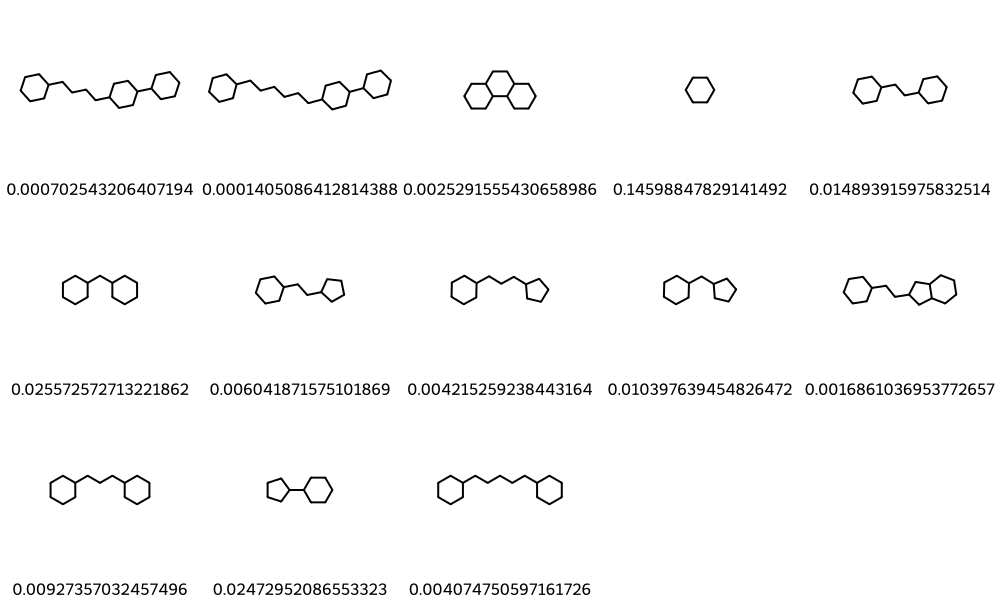

In [46]:
Draw.MolsToGridImage([Chem.MolFromSmiles(idx) for idx in df_scaffolds_vs_drugbank['Scaffold']], molsPerRow=5, subImgSize=(200,200), legends=[str(idx) for idx in df_scaffolds_vs_drugbank['Ratio_db']])



The output is a grid of molecular structures, where each row contains 5 molecules. The molecules are represented by their two-dimensional structures and are labeled with a numerical value representing the ratio of the count of the scaffold in the DrugBank dataset to the total count of all scaffolds in the DrugBank dataset. The higher the numerical value, the more frequent the scaffold is in the DrugBank dataset.